In [1]:
import os
import yaml
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

# read configuration file
with open('roman_hlwas_wide.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [2]:
data_dir = config['data_dir']
save_dir = os.path.join(data_dir, 'cached_psfs')
psf_npy_files = sorted(glob(os.path.join(save_dir, '*.npy')))

num_samples = 25

psfs, psf_names = [], []
for f in np.random.choice(psf_npy_files, size=num_samples, replace=False):
    psf_name = os.path.basename(f).split('.')[0]
    psf = np.load(f)
    psf_names.append(psf_name)
    psfs.append(psf)

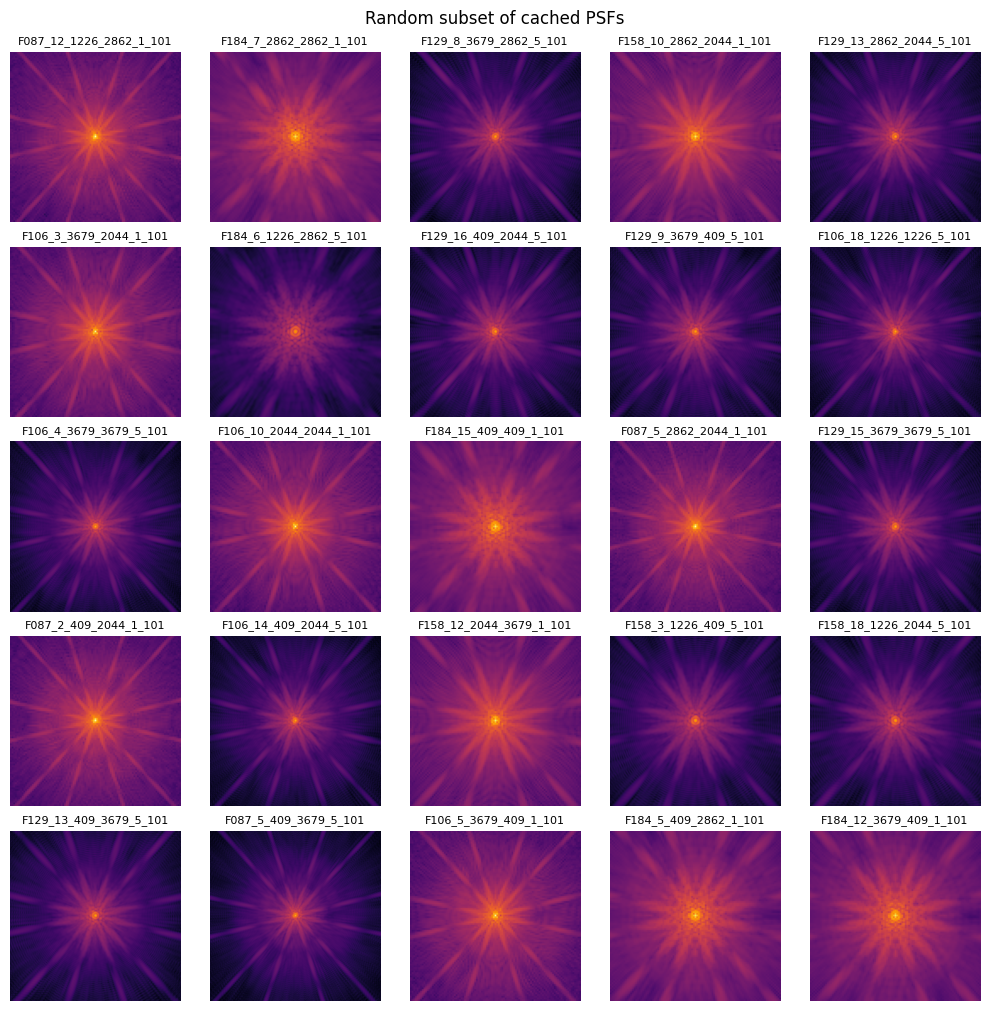

In [3]:
vmin = np.log10(np.min([np.min(psf) for psf in psfs]))
vmax = np.log10(np.max([np.max(psf) for psf in psfs]))

_, ax = plt.subplots(5, 5, figsize=(10, 10), constrained_layout=True)

for i, a in enumerate(ax.flatten()):
    a.imshow(np.log10(psfs[i]), cmap='inferno', vmin=vmin, vmax=vmax)
    a.set_title(psf_names[i], fontsize=8)
    a.axis('off')

plt.suptitle('Random subset of cached PSFs')
plt.show()